<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Multi_Linear_Regression_inclass_exercise_toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
#Read the data
cars = pd.read_csv('/content/Toyoto_Corrola.csv')
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
cars = cars.drop(['Id', 'Model'], axis=1)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [ ]:
#Check for missing values
cars.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

#Correlation Matrix

In [ ]:
cars.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


In [ ]:
cars.describe()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


There is no variation in the Cylinder column, as the Std is 0 and the mean, median, min and Max is same i.e 4.
so we will drop the Cylinder column.

In [ ]:
cars=cars.drop('Cylinders', axis=1)

#Scatterplot between variables along with hystogram

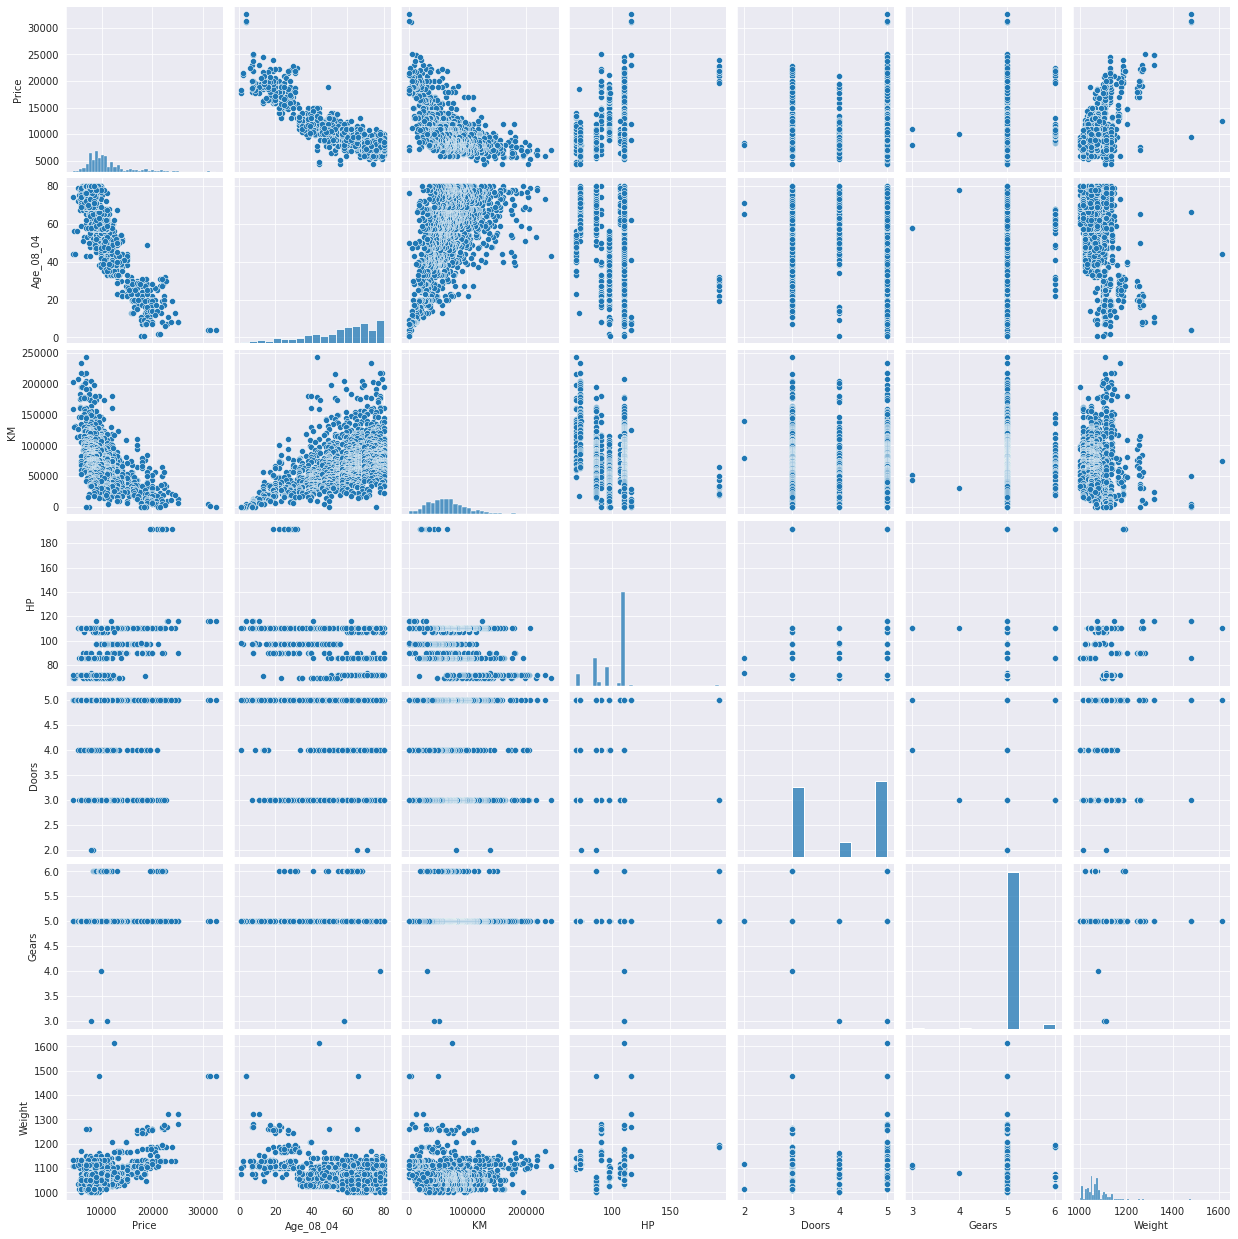

In [ ]:
#Format the plot background and scatter Plots for all the variable
sns.set_style(style='darkgrid')
sns.pairplot(cars)

#Preparing a model

In [ ]:
cars.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Gears', 'Weight'], dtype='object')

In [ ]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight', data=cars).fit()

In [ ]:
#Coefficients
model.params

Intercept   -6984.373566
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [ ]:
#R Squared Values
(model.rsquared, model.rsquared_adj)

(0.8628024511073656, 0.8622263942190831)

Simple Linear Regression step is not required as the pvalue is less than the (0.05)

#Residual Analysis

#### Text for Normality of Residuals (Q-Q Plot)

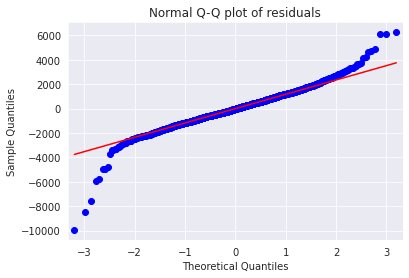

In [ ]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line ='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
list(np.where(model.resid > 6000))

[array([109, 147, 523])]

In [ ]:
list(np.where(model.resid <  -6000))

[array([221, 601, 960])]

#Residual Plot for Homoscedasticity

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_standardize_values( vals ):
    return(vals - vals.mean())/vals.std()

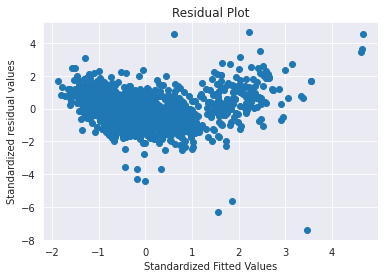

In [ ]:
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid))

plt.title("Residual Plot")
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual values')
plt.show()

#Residual Vs Regressors

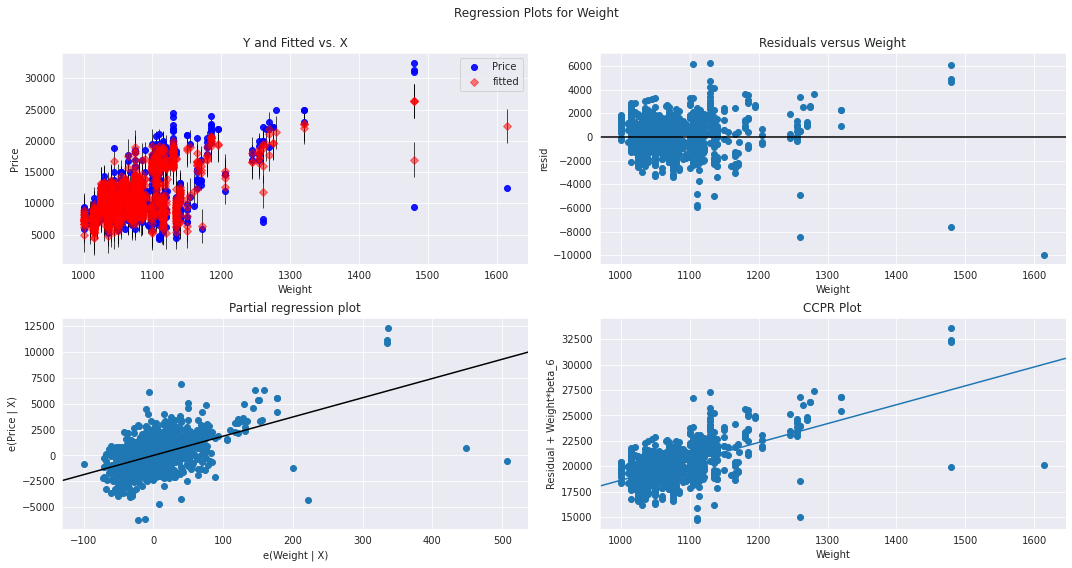

In [ ]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

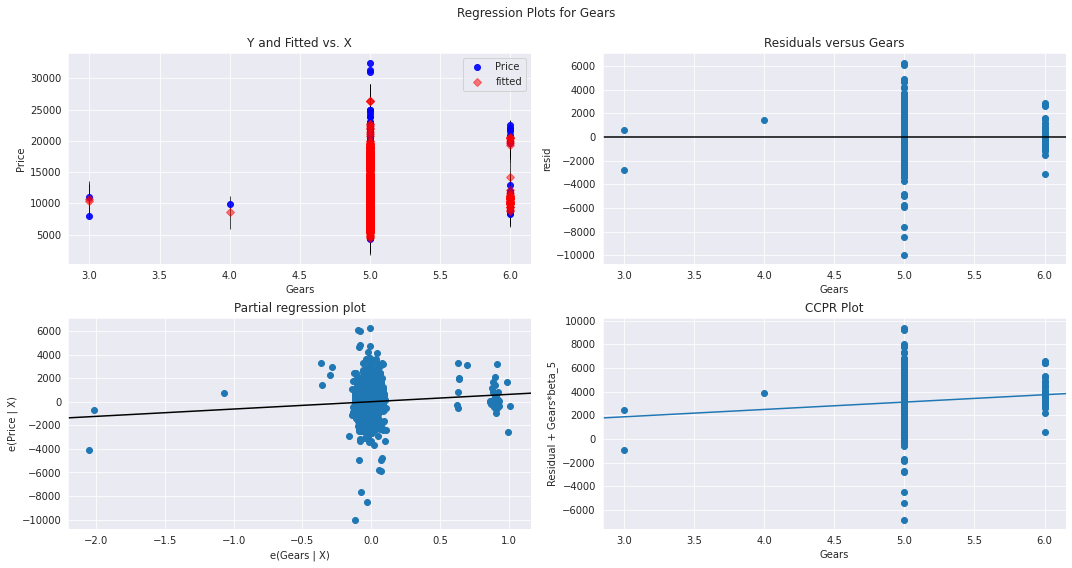

In [ ]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

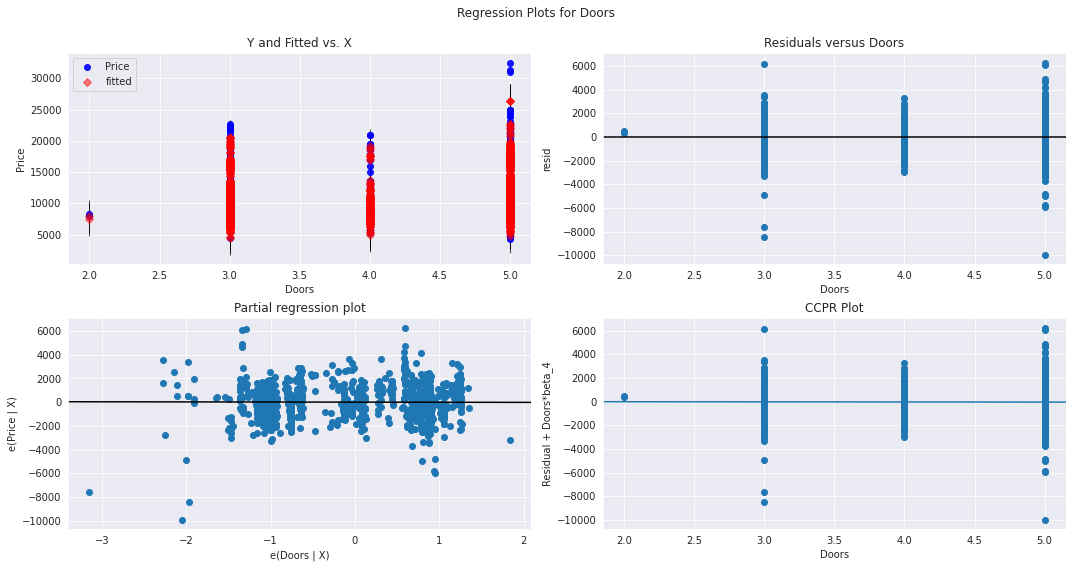

In [ ]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

As the CCRP graph indicate 0, there is no correlation between the doors and the Price.

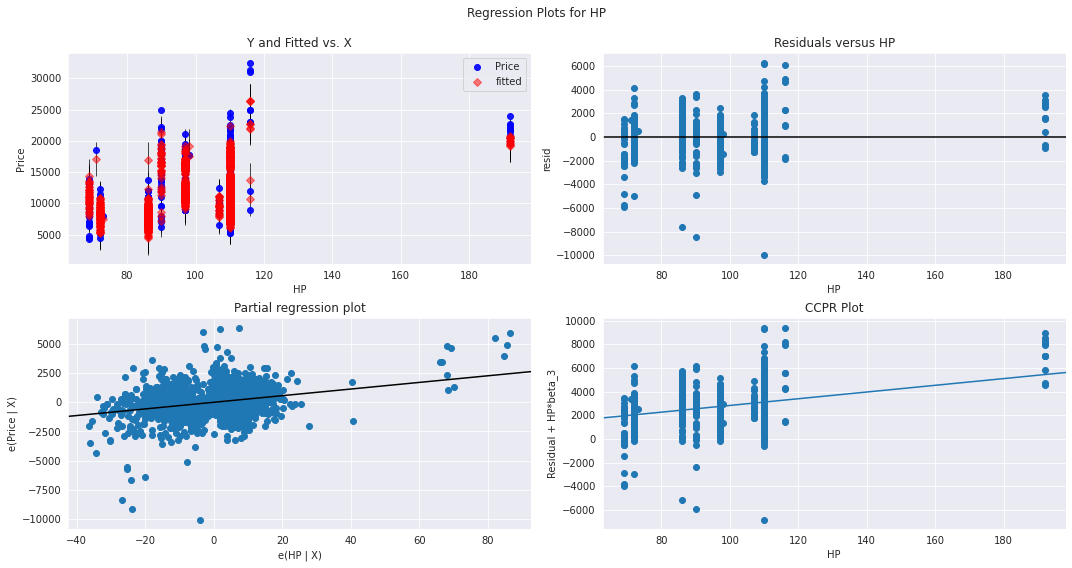

In [ ]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

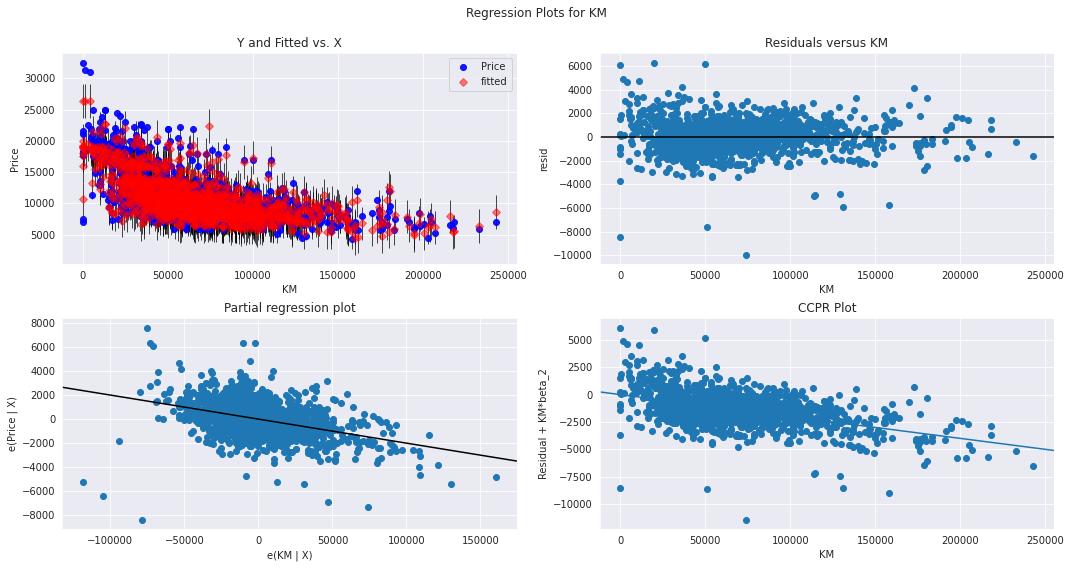

In [ ]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

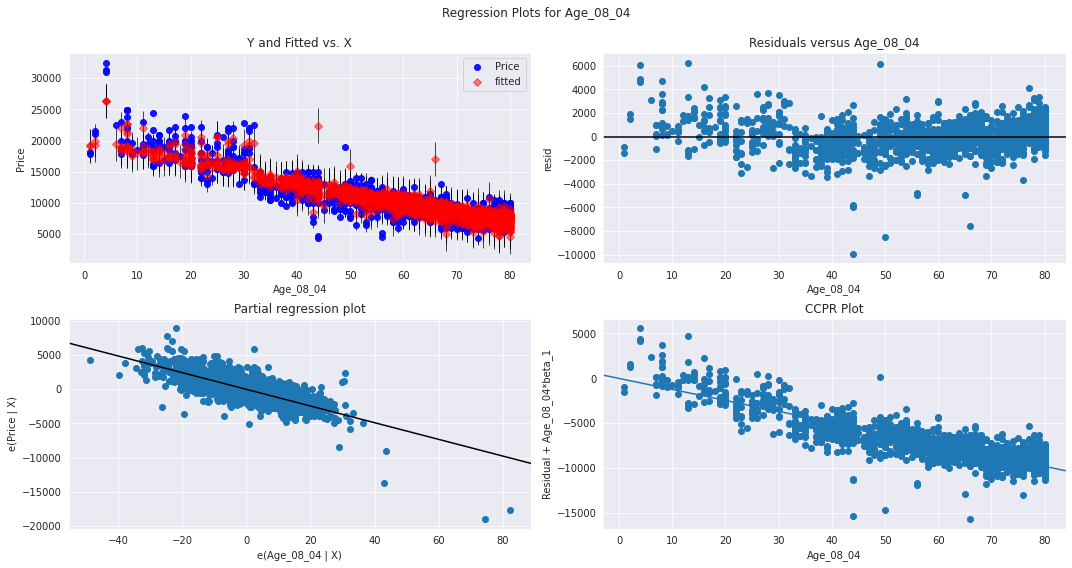

In [ ]:
fig = plt.figure(figsize= (15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

#Model Deletion Diagnostics

###Detecting Influencers/Outliers

#Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


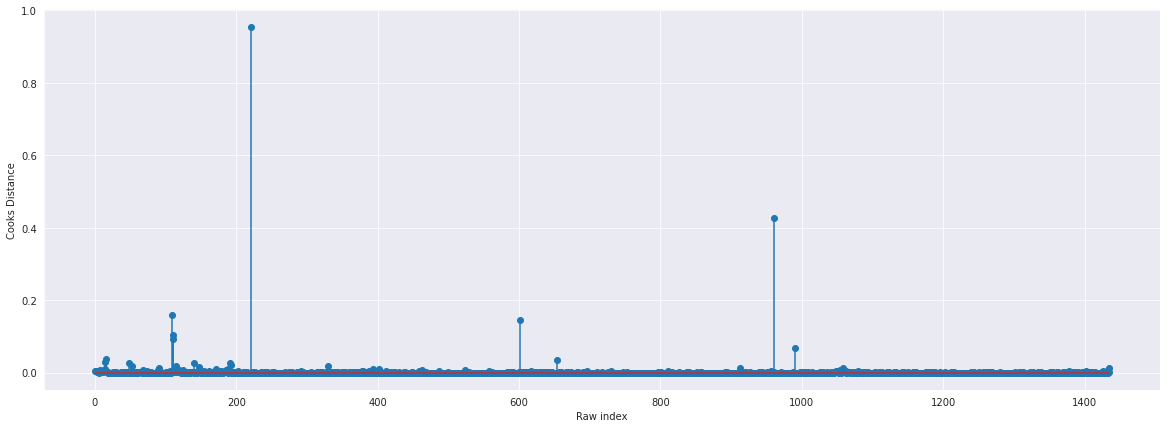

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(cars)), np.round(c,3))
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and values of influencer where c is near 1
(np.argmax(c), np.max(c))

(221, 0.9553151438693979)

#High indluence points

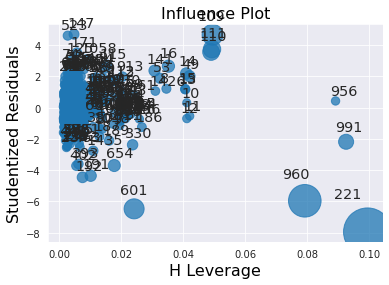

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

0.016713091922005572

Remove the data point which are more than 0.016

#Improving the model

In [ ]:
#Load the data
cars_new = pd.read_csv('/content/Toyoto_Corrola.csv', index_col=[0])

In [ ]:
cars1 = cars_new.drop(cars_new.index[[221,960]], axis=0).reset_index()

In [ ]:
cars1 = cars1.drop(['Id', 'Model', 'Cylinders'], axis=1)

In [ ]:
cars1.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


#Build Model

In [ ]:
final_ml = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight', data=cars1).fit()

In [ ]:
(final_ml.rsquared, final_ml.aic)

(0.8728201848607587, 24633.588496856977)

#Predicting for new Data

In [ ]:
#New data for prediction
new_data = pd.DataFrame({'Age_08_04':23,"KM":46986, 'HP' : 90, 'Doors':3, 'Gears':5, 'Weight': 1165}, index=[1])

In [ ]:
new_data

,Age_08_04,KM,HP,Doors,Gears,Weight
1,23,46986,90,3,5,1165


In [ ]:
final_ml.predict(new_data)

1    16845.89554
dtype: float64